# BIOS 512 Final
## Exploring TidyTuesday Data on Astonaut Missions

In [77]:
library(tidyverse)
library(dplyr)

In [78]:
space = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-14/astronauts.csv')

space |> head()

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,⋯,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,⋯,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0,0
2,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,⋯,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0,0
3,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,⋯,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0,0
4,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,⋯,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0,0
5,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,⋯,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0,0
6,6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,⋯,1962,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0,0


## Chart 1 - Exploring how mission length has changed over time

In [79]:
space |>
    group_by(nationality) |>
    count() |>
    arrange(desc(n))

nationality,n
<chr>,<int>
U.S.,854
U.S.S.R/Russia,273
Japan,20
Canada,18
France,18
Germany,16
China,14
Italy,13
U.K./U.S.,6


In [80]:
space2 = space |>
    mutate(
        country_w_other = ifelse(nationality %in% c('U.S.', 'U.S.S.R/Russia', 'Japan', "Canada", "France", "Germany", "China", "Italy"), nationality, 'other')
    )

space2

id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,⋯,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,country_w_other
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,⋯,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.00,0.00,U.S.S.R/Russia
2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,⋯,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.00,0.00,U.S.S.R/Russia
3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,⋯,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.00,0.00,U.S.
4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,⋯,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.00,0.00,U.S.
5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,⋯,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.00,0.00,U.S.
6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,⋯,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0.00,0.00,U.S.S.R/Russia
7,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-2,⋯,Soyuz 9,Soyuz 9,Soyuz 9,Soyuz 9,424.00,519.33,0,0.00,0.00,U.S.S.R/Russia
8,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,TsPK-1,⋯,Vostok 4,Vostok 4,Vostok 4,Vostok 4,70.93,448.45,0,0.00,0.00,U.S.S.R/Russia
9,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,TsPK-2,⋯,Soyuz 14,Soyuz 14,Soyuz 14,Soyuz 14,377.00,448.45,0,0.00,0.00,U.S.S.R/Russia


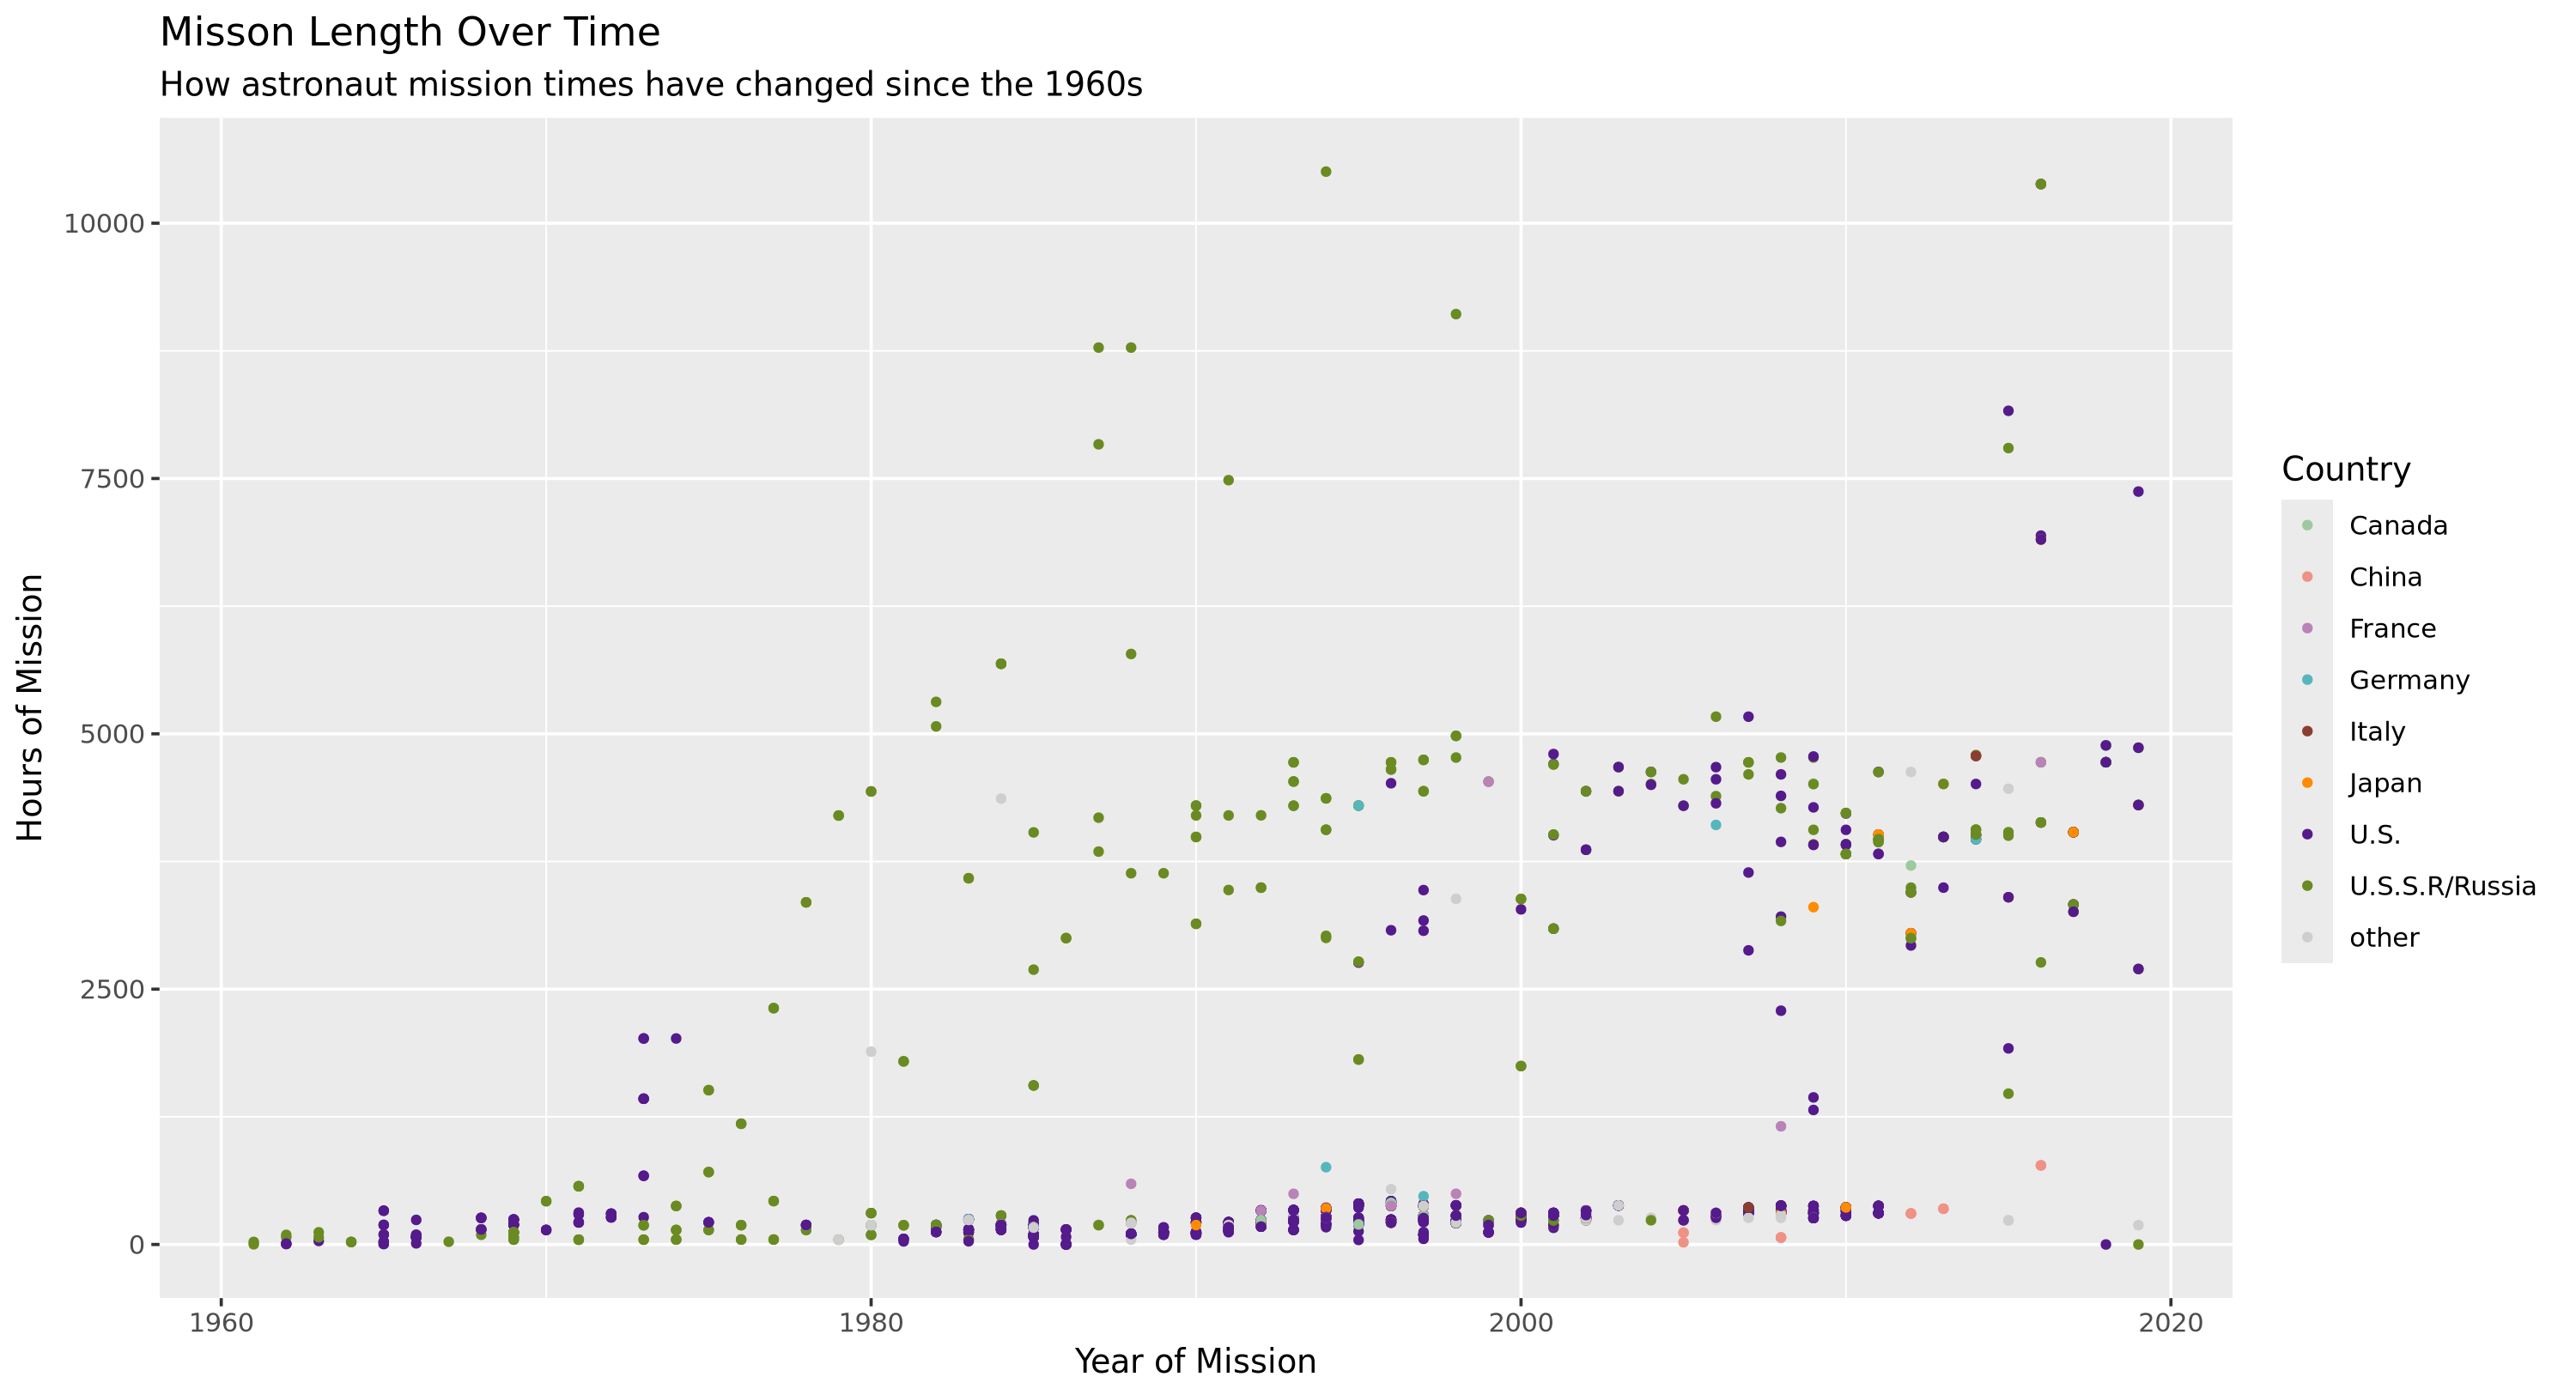

In [90]:
colors = c('#9cca9e', '#ef9285', '#b983b7', '#56b6be', '#8B3E2F', '#FF8C00', '#551A8B', '#698B22', '#cecece')
bg = '#f0f0f0'

options(repr.plot.width = 12, repr.plot.height = 6.5, repr.plot.res = 250)

ggplot(space2, aes(y = hours_mission, x = year_of_mission, color = country_w_other)) + geom_point(size = 1) +
labs(
        title = 'Misson Length Over Time',
        subtitle = 'How astronaut mission times have changed since the 1960s',
        x = 'Year of Mission',
        y = 'Hours of Mission'
 ) + 
    scale_color_manual(values = colors) +
labs(color = 'Country')

## Chart 2 - Exploring the proportion of military versus civilian astronauts

In [82]:
space3 = space2 |>
    group_by(country_w_other) |>
    count(military_civilian) |>
    arrange(desc(n))

space3

country_w_other,military_civilian,n
<chr>,<chr>,<int>
U.S.,military,512
U.S.,civilian,342
U.S.S.R/Russia,military,188
U.S.S.R/Russia,civilian,85
other,civilian,34
Japan,civilian,19
other,military,17
China,military,14
France,military,14


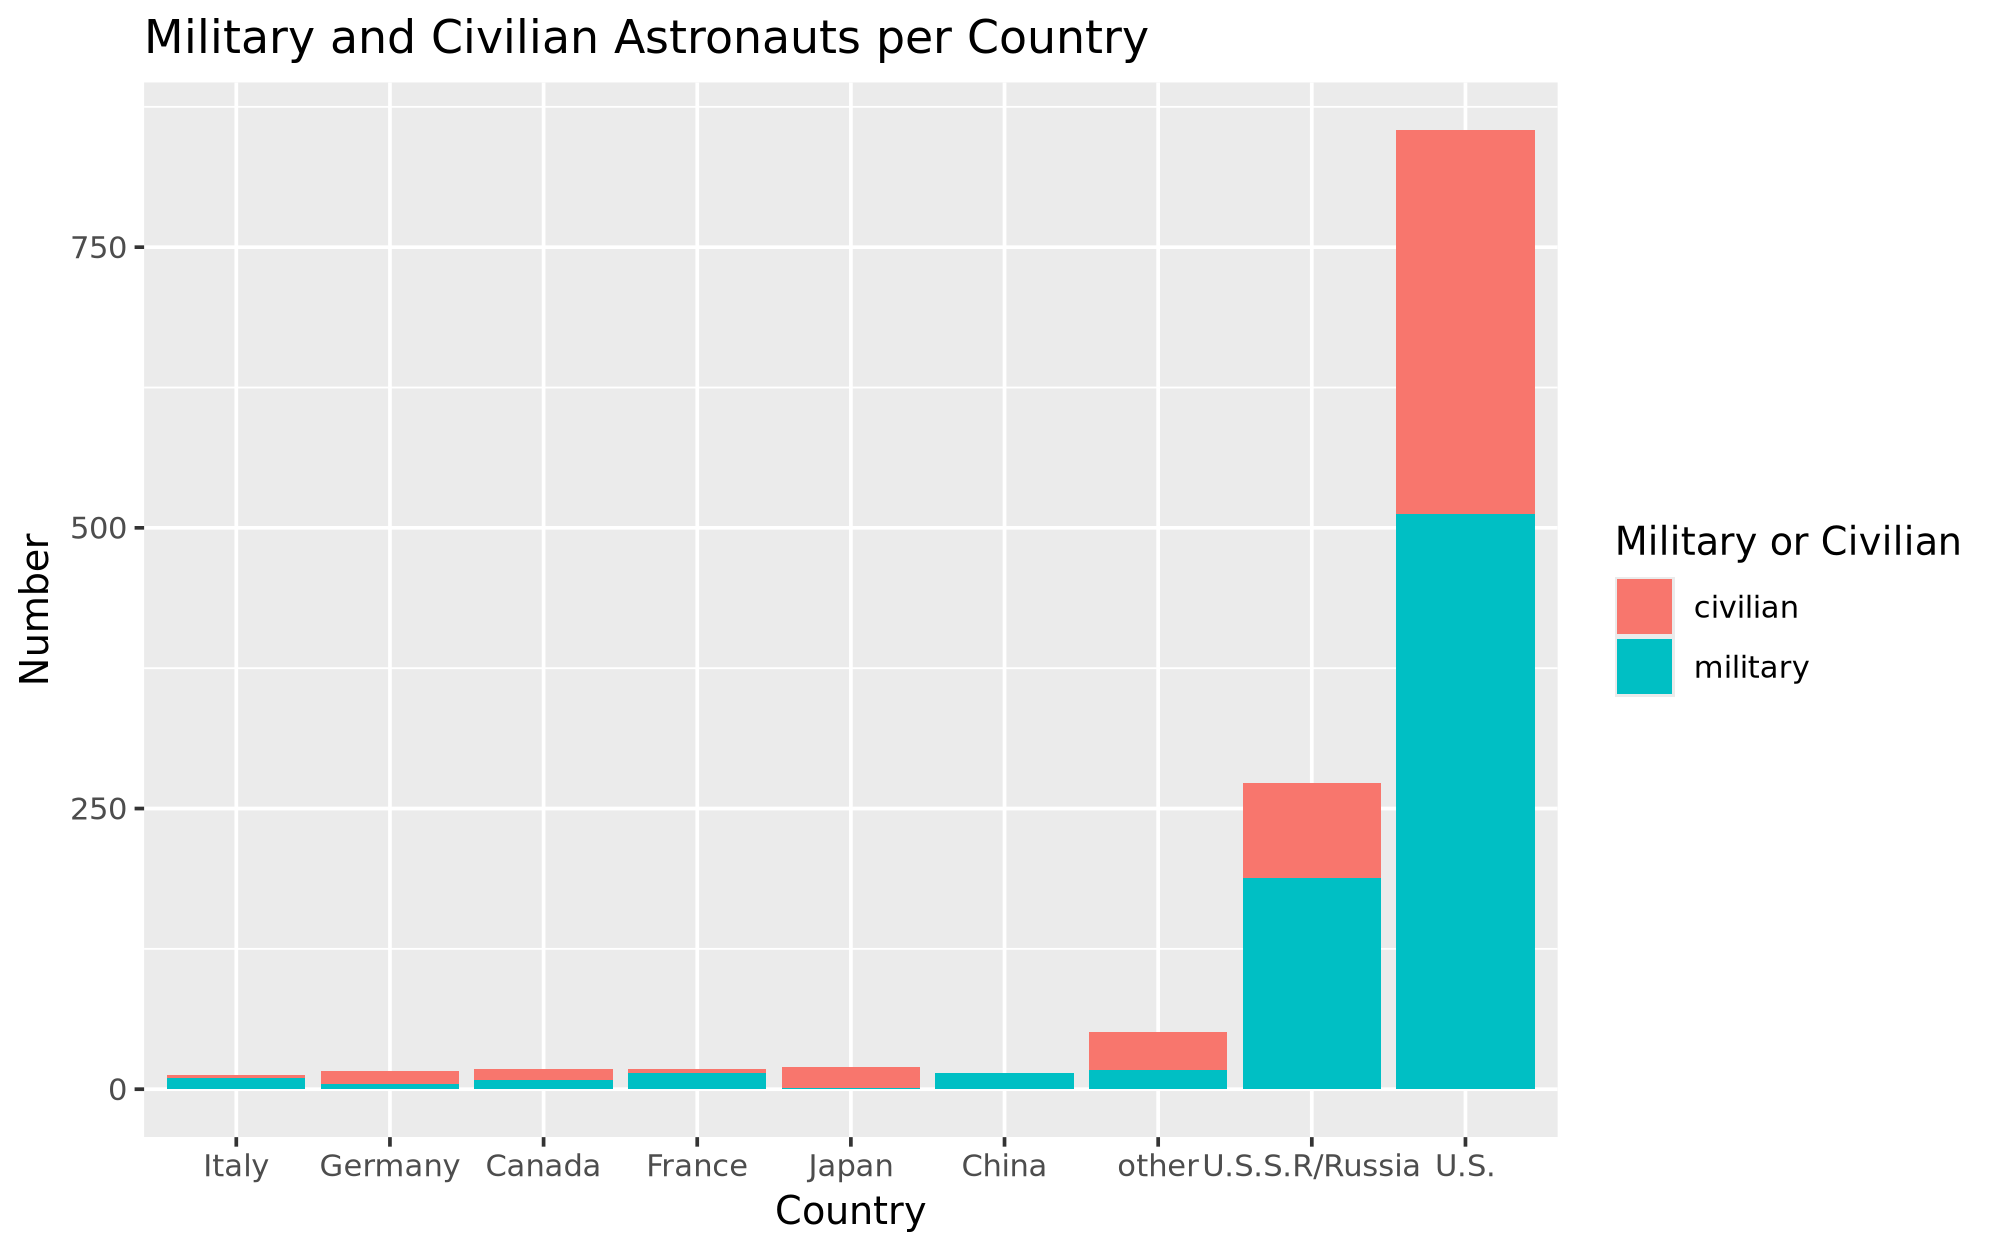

In [83]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 250)


ggplot(space3, aes(x = fct_reorder(country_w_other, n), y = n, fill = military_civilian)) + geom_col() +
labs(
        title = 'Military and Civilian Astronauts per Country',
        x = 'Country',
        y = 'Number',
        fill = 'Military or Civilian'
 ) 

## Chart 3 - Exploring mission versus total hours, by sex

In [84]:
space4 = space |>
    pivot_longer(cols = c(total_hrs_sum, hours_mission), names_to = 'measurement')

space4

id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,⋯,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,field21,eva_hrs_mission,total_eva_hrs,measurement,value
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,⋯,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,0,0,0,total_hrs_sum,1.77
1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,⋯,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,0,0,0,hours_mission,1.77
2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,⋯,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,0,0,0,total_hrs_sum,25.30
2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,⋯,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,0,0,0,hours_mission,25.00
3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,⋯,1962,MA-6,MA-6,MA-6,MA-6,0,0,0,total_hrs_sum,218.00
3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,⋯,1962,MA-6,MA-6,MA-6,MA-6,0,0,0,hours_mission,5.00
4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,⋯,1998,STS-95,STS-95,STS-95,STS-95,0,0,0,total_hrs_sum,218.00
4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,⋯,1998,STS-95,STS-95,STS-95,STS-95,0,0,0,hours_mission,213.00
5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,⋯,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,0,0,0,total_hrs_sum,5.00


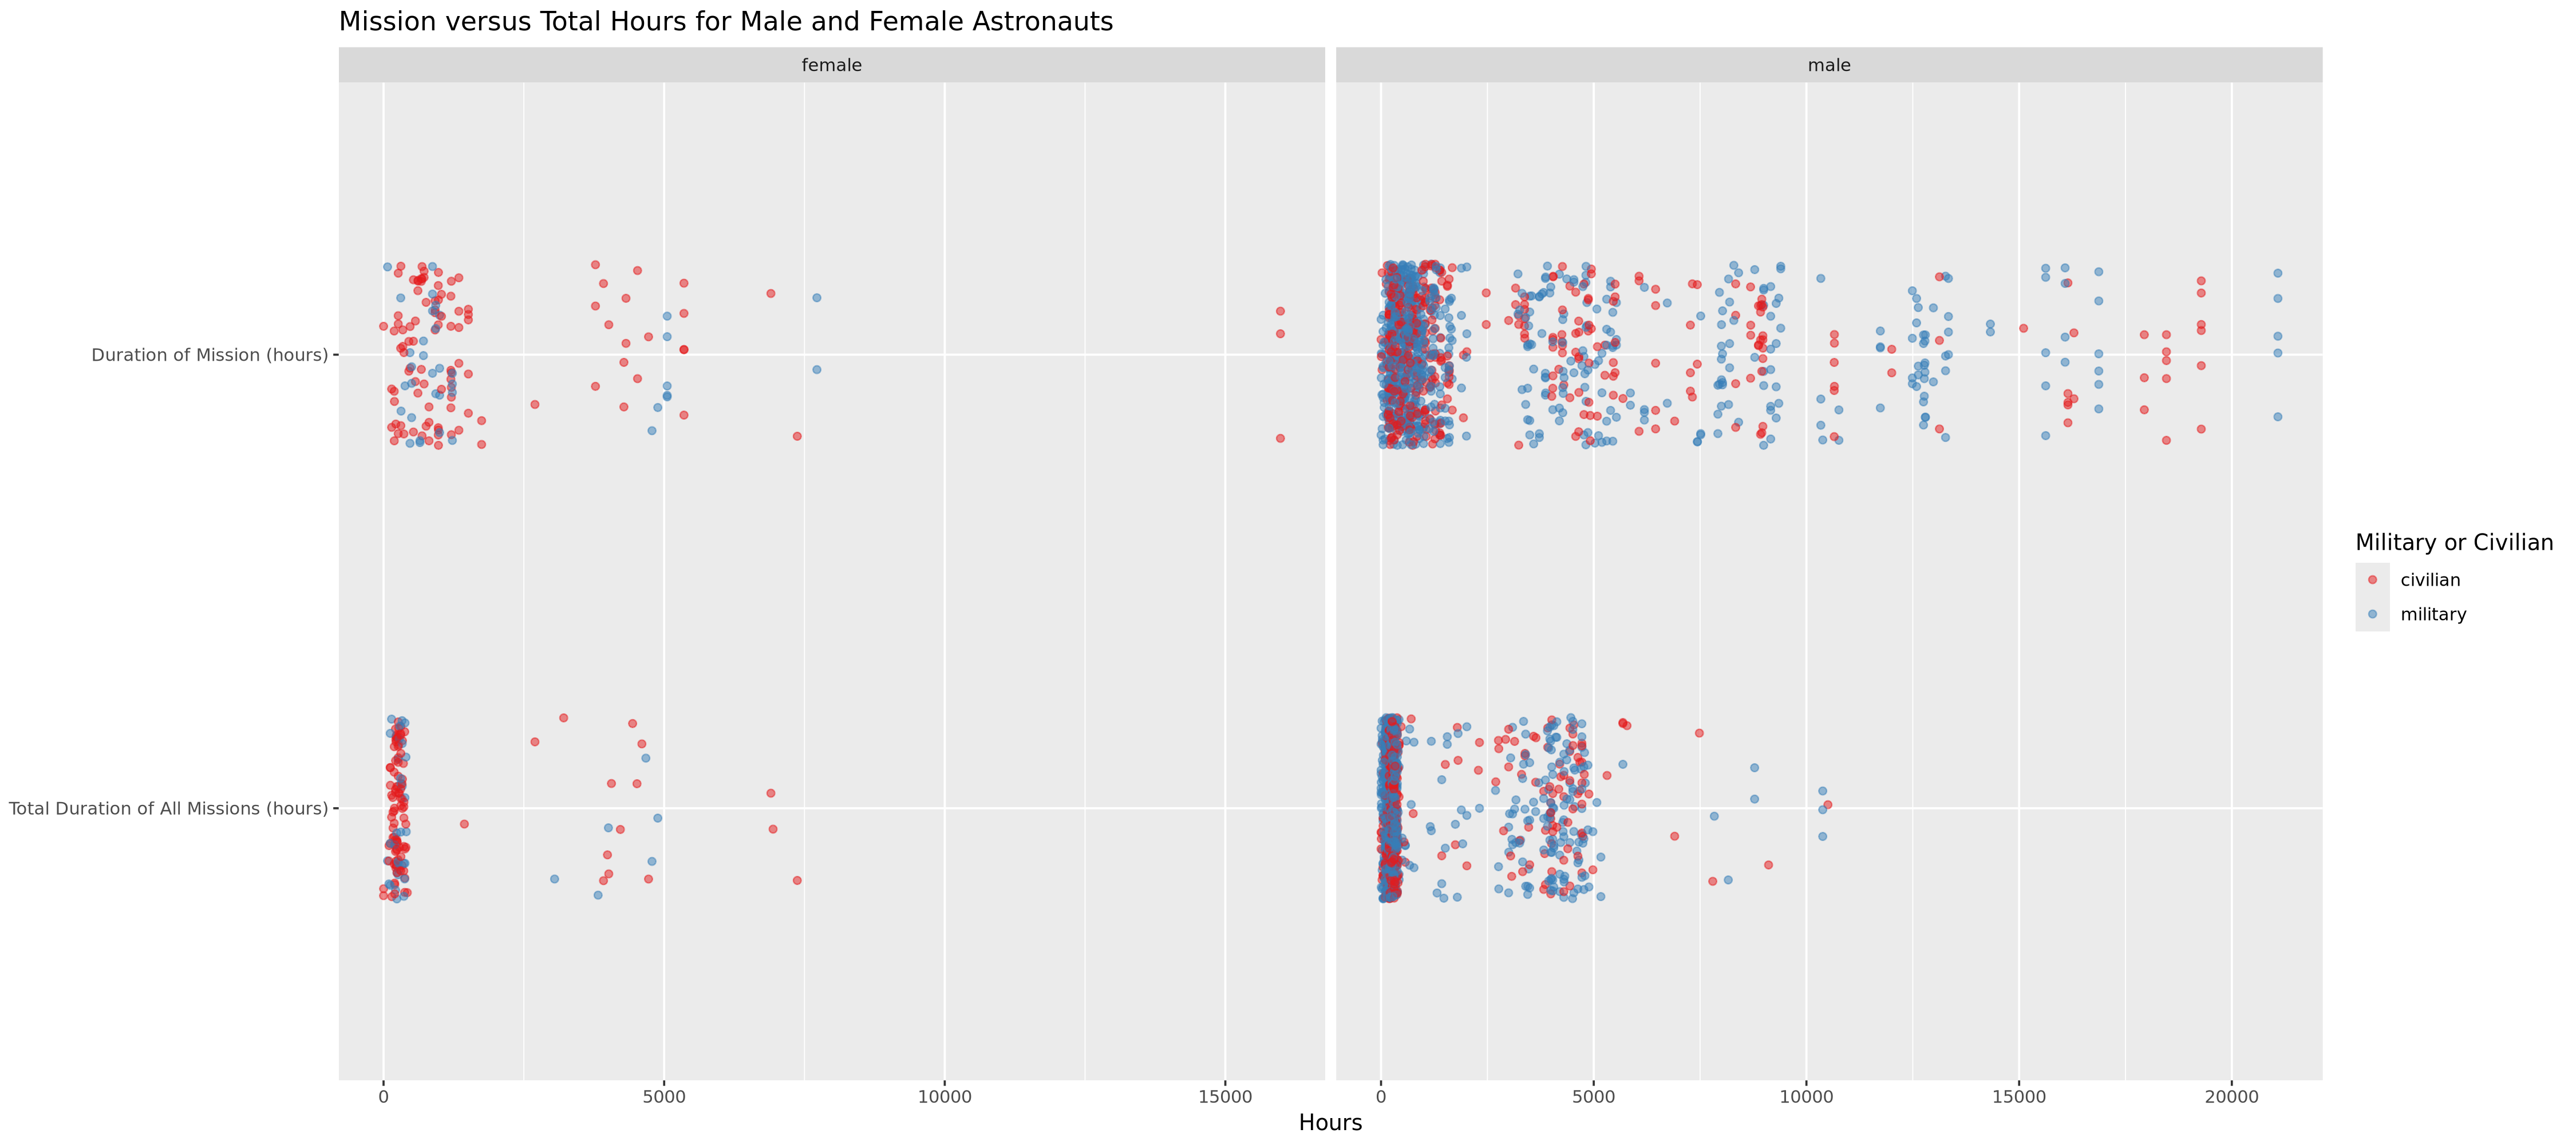

In [94]:
options(repr.plot.width = 18, repr.plot.height = 8)

ggplot(space4, aes(x = value, y = measurement, color = military_civilian)) +
    geom_point(alpha = 0.5, position = position_jitter(height = 0.2, width = 0)) +
    scale_color_brewer(palette = 'Set1') +
    facet_wrap(~sex, scales = 'free_x') +
labs(
        title = 'Mission versus Total Hours for Male and Female Astronauts',
        x = 'Hours',
        y = NULL,
        color = 'Military or Civilian'
 ) +
scale_y_discrete(labels=c("total_hrs_sum"="Duration of Mission (hours)", "hours_mission"="Total Duration of All Missions (hours)"))

## Analysis

#### I found this data set interesting and feasible to investigate, because of the huge changes in space exploration over time (increasing duration of missions, more countries involved, more women astronauts) as well as a good mix of categorical and quanitative data, which made making visualizations more fun. For my first chart, I wanted to explore the relationship between how long missions were and time. I hypothesized that as space exploration became more well understood and safer with time, the mission lengths would increase. That appears to be the case in the scatterplot. Additionally, I wanted to express the countries who sent astronauts that were involved in these missions, but there were so many countries involved that it felt easier to add an 'other' column for countries with fewer than 10 astonauts, to best visualize the diversity of countries who were involved.

#### For my second chart, I was curious about the inclusion of both military and civilian astronauts, and wanted to see if there was any pattern between countries about whether more cilivians or military astronauts were involved. This chart honestly didn't provide much insight, since in mostly seems that for the majority of countries it is about half-and-half on who was involved (although USSR/Russia has more military than others, which isn't necessarily surpising considering the their history). Finally, my third visualization, I was curious to put several different variables I had explored together, into one chart. I wanted to see how Duration of Mission versus Total Duration of All Missions for astronauts differed both by sex, as well as by civilian status. This chart allowed me to use Jitter for my points, a free x axis, and facet wrap! It shows that generally, women's mission hours are lower, women are more likely to be cilivians than military, and that the majority of mission hours are comparitively quite low (under ~1000 hours). 

PS - I was so nervous to learn R, and I now feel so much more confident, and like I have the skills to research and teach myself more whenever I need to. This class was so helpful for a beginner, and I really appreciate all your help all semester!